In [67]:
#1-Import the package
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [68]:
#import and loading
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:

path_to_data = "/content/drive/MyDrive/Colab Notebooks/loans.csv"
data = pd.read_csv(path_to_data, index_col="client_id")


In [72]:
# Display 5 row
print("The first 5 rows of the dataset:")
print(data.head())


The first 5 rows of the dataset:
          loan_type  loan_amount  repaid  loan_id  loan_start    loan_end  \
client_id                                                                   
46109          home        13672       0    10243  2002-04-16  2003-12-20   
46109        credit         9794       0    10984  2003-10-21  2005-07-17   
46109          home        12734       1    10990  2006-02-01  2007-07-05   
46109          cash        12518       1    10596  2010-12-08  2013-05-05   
46109        credit        14049       1    11415  2010-07-07  2012-05-21   

           rate  
client_id        
46109      2.15  
46109      1.25  
46109      0.68  
46109      1.24  
46109      3.13  


In [71]:
#Chcek info
print("Info of the dataset:")
print(data.info())

Info of the dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB
None


In [73]:
#Determine missing values
print("Missing values in the dataset:")
print(data.isnull().sum())

Missing values in the dataset:
loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64


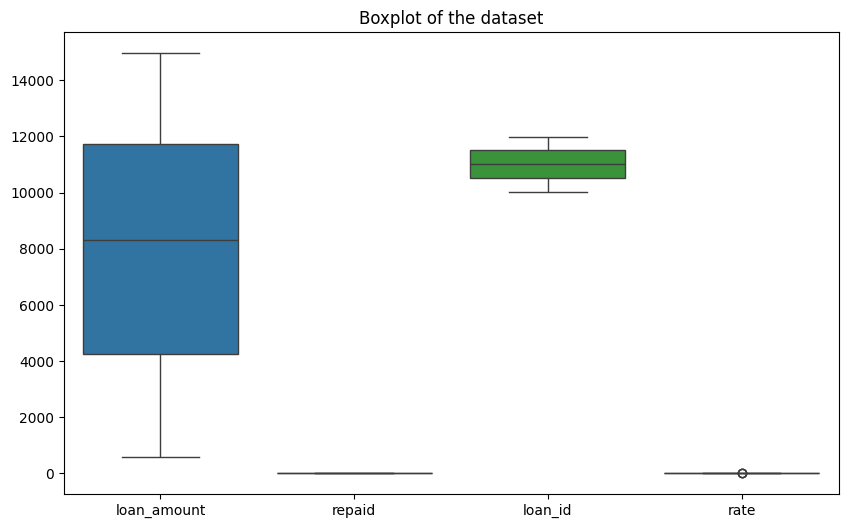

In [74]:
#Chcek outliers with Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title("Boxplot of the dataset")
plt.show()

In [78]:
# Step 7: Handling outliers
# a. SQRT transformation
numeric_cols = data.select_dtypes(include=np.number).columns
df_sqrt = data[numeric_cols].apply(np.sqrt)

In [77]:
numeric_columns = data.select_dtypes(include=np.number)

In [79]:
# b. Capping approach: Z-Score
num_data = data.select_dtypes(include=[np.number])
z_scores = zscore(num_data)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_zscore = data[filtered_entries]

In [80]:
#Scaling numerical variables using Min-Max Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['loan_amount']])

In [81]:
#variables into dummy variables
data_zscore = data[(z_scores < threshold).all(axis=1)]

In [82]:
#reating new derived features to calculate loan tenure
data['loan_start'] = pd.to_datetime(data['loan_start'])
data['loan_end'] = pd.to_datetime(data['loan_end'])
data['loan_tenure'] = (data['loan_end'] - data['loan_start']).dt.days

In [83]:
#Splitting the data into training and test sets with 80-20 division
from sklearn.model_selection import train_test_split
X = data.drop(columns=['repaid'])
y = data['repaid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
